# 14 Sept 23 - Activity: Conducting a complete analysis of an ODE

We've built up all the tools that we use to investigate ODEs. Now we are going to practice with an oscillator that exhibits really interesting dynamics: the [Van der Pol oscillator](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator). This equation originates from nonlinear circuits in early radios, but has now also been used in neuroscience and geology. It is given by the differential equation:

$$
\ddot{x} = -\mu (x^2 - 1)\dot{x} - x
$$

or, written as two first order equations:

$$
\dot{x} = v \hspace{1in} \dot{v} = -\mu (x^2 - 1)v - x
$$

With $\mu > 0$. Note that this equation is simply the harmonic oscillator when $\mu = 0$. The strange $-\mu (x^2 - 1)\dot{x}$ represents damping, but this damping behaves strangely, because when $|x|<1$ it is negative damping, that is it boosts oscillations smaller than $1$, while still slowing down oscillations larger than $1$. 

Now we play the usual game of trying to figure out how this system behaves:

**&#9989; Do this** 

1. Identify the fixed point of this system. Follow the linearization procedure to characterize it. 
2. Edit the code below to produce a phase plot for the Van der Pol oscillator. This code also numerically integrates a trajectory and plots it. Add a second trajectory and plot that as well.
3. What happens to phase space when you change the value of $\mu$? What if you make it negative?
4. What behavior do you notice here that's different than you've seen before? What is attracting the trajectories?

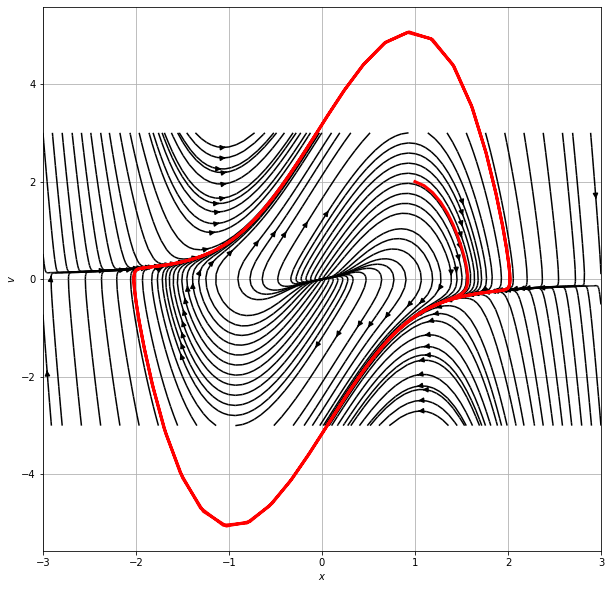

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def VP_eqn(x, v, mu = 1.):
    xdot, vdot = [v,-mu*(x**2 -1)*v -x] ## CHANGE
    return xdot, vdot

def VP_phase(X, VX, mu):
    xdot, vdot = np.zeros(X.shape), np.zeros(VX.shape)
    Xlim, Ylim = X.shape
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], vdot[i,j] = VP_eqn(xloc, yloc,mu)
    return xdot, vdot

def VP_eqn_for_solve_ivp(t,curr_vals, mu=1): # need to rephrase this to work with what solve_ivp expects
    x, v = curr_vals 
    xdot, vdot = VP_eqn(x,v,mu)
    return xdot,vdot

# Numerical Integration
tmax = 20
dt = 0.05
tspan = (0,tmax)
t = np.arange(0,tmax,dt)
mu = 3.
initial_condition = [1, 2] 
solved = solve_ivp(VP_eqn_for_solve_ivp,tspan,initial_condition,t_eval = t, args = (mu,),method="RK45")


# Plotting stuff
N = 40
x = np.linspace(-3., 3., N)
v = np.linspace(-3., 3., N)
X, V = np.meshgrid(x, v)
xdot, vdot = VP_phase(X, V,mu)
ax = plt.figure(figsize=(10,10))
Q = plt.streamplot(X, V, xdot, vdot, color='k',broken_streamlines = False)
plt.plot(solved.y[0],solved.y[1],lw = 3,c = 'red') # plot trajectory from solve_ivp
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$v$')
plt.show()

**&#9989; Do this** 

Based on the phase space diagram, what do you expect actual trajectories to look like in $x$ vs $t$ space? Use the numerically integrated trajectories to plot that.

### Limit Cycles

The new behavior we've seen from this equation is what's called a **limit cycle**, where the system is attracted/reppeled from a closed curve instead of a fixed point(s). There's a lot of really great math here that's a bit beyond what we can cover in class, but it would be a great thing to look into for a project!

**&#9989; Do this** 

Spend the rest of class investigating the Van der Pol oscillator. Here are a few investigations you could do:

 - When $\mu$ changes from negative to positive, this system undergoes what is known as a **Hopf Bifurcation** Look up what bifurcations are to understand what this means and show that it is true using numerical integration. 
 - Add an $A\sin(t)$ driving force term to the differential equation and numerically integrate. What do these trajectories look like in $x$ vs $t$ and in phase space?
 - Examine the energetics of this system. Is energy conserved or does it have some interesting behavior? Why?